**Learn note for `GALFIT`**  

练习1: 复制`galfit-example`里的`EXAMPLE`文件到此程序所在目录，重命名为`example`  
练习2: 挑一个cosmos的源做test  
@time: 2022.07.07  
@[GALFIT web](https://users.obs.carnegiescience.edu/peng/work/galfit/galfit.html)


In [7]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import numpy as np

# ^ 禁用同一单元格内的输出覆盖
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 官方提供的测试例子
PATH_example = "/Users/rui/Code/1_Astronotes/11_GALFIT/example"
# a source in COSMOS
PATH_test = "/Users/rui/Code/1_Astronotes/11_GALFIT/test"

# Example

## Input files  
1. gal.fits
2. galfit.feedme
3. psf.fits

输入图像的性质

In [27]:
# 输入图像
PATH_example_image = os.path.join(PATH_example, 'gal.fits')

hdul = fits.open(PATH_example_image)
hdul.info()

header = hdul[0].header
data = hdul[0].data

Filename: /Users/rui/Code/1_Astronotes/11_GALFIT/example/gal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     395   (93, 93)   float32   


In [28]:
# 查看data大小和header里的单位和曝光时间
print("="*20 + " 需要核查的内容 " +"="*20)
print("data最大值:\t", np.max(data))
print("brightness units:\t", header['BUNIT'])  # 如果单位是ELECTRONS/S，则需要将数据乘以曝光时间
print("曝光时间:\t", header['EXPTIME'])

==================== 需要核查的内容 ====================
data最大值:	 1037.8079
brightness units:	 ELECTRONS
曝光时间:	 1040.0


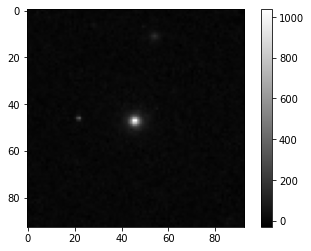

In [29]:
plt.imshow(data, cmap='gray')
plt.colorbar()

psf性质

In [32]:
PATH_psf = os.path.join(PATH_example, 'psf.fits')

hdul = fits.open(PATH_psf)
hdul.info()

data = hdul[0].data
# hdul[0].header

Filename: /Users/rui/Code/1_Astronotes/11_GALFIT/example/psf.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     179   (51, 51)   float32   


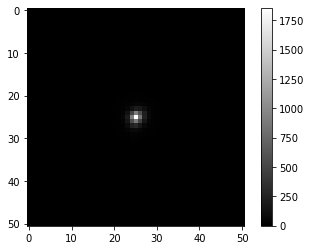

In [33]:
plt.imshow(data, cmap='gray')
plt.colorbar()

## Output files

`imgblock.fits`: 输出图像的FITS cube

In [34]:
PATH_example_out = os.path.join(PATH_example, 'imgblock.fits')

hdul = fits.open(PATH_example_out)
hdul.info()

Filename: /Users/rui/Code/1_Astronotes/11_GALFIT/example/imgblock.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (93, 93)   float32   
  1                1 ImageHDU       391   (93, 93)   float32   
  2                1 ImageHDU        43   (93, 93)   float32   
  3                1 ImageHDU         6   (93, 93)   float32   


In [35]:
# 拟合结果在第2层的header里
hdul[2].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                   93 / Length of data axis 1                          
NAXIS2  =                   93 / Length of data axis 2                          
OBJECT  = 'model   '           / Component type                                 
COMMENT ========== GALFIT Input Parameters ==========                           
INITFILE= 'galfit.feedme'      / GALFIT input file                              
DATAIN  = 'gal.fits'           / Input data image                               
SIGMA   = 'none    '           / Input sigma image                              
PSF     = 'psf.fits '          / Convolution PSF and kernel                     
CONSTRNT= 'none    '           / Parameter constraint file                      
MASK    = 'none    '        

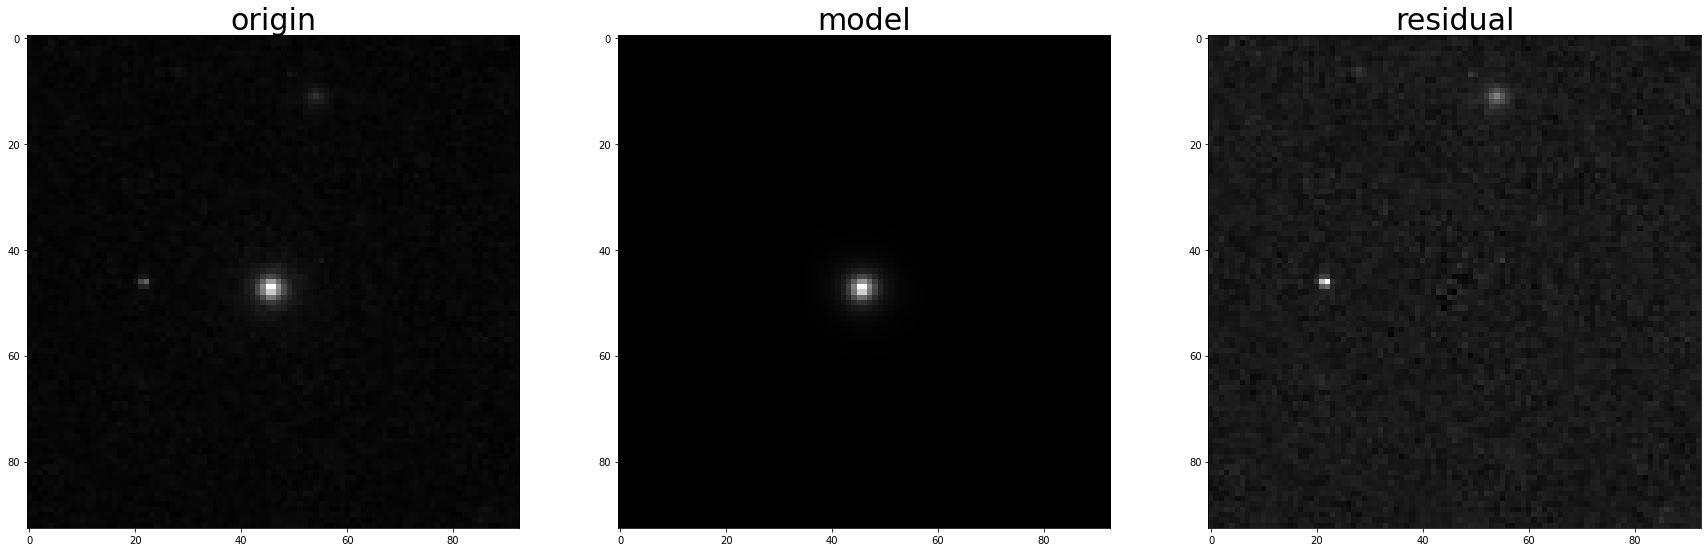

In [36]:
image1 = hdul[1].data
image2 = hdul[2].data
image3 = hdul[3].data

fig, ax = plt.subplots(1, 3, figsize=(30, 10))

ax[0].set_title('origin', fontsize=30)
ax[0].imshow(image1, cmap='gray');

ax[1].set_title('model', fontsize=30)
ax[1].imshow(image2, cmap='gray');

ax[2].set_title('residual', fontsize=30)
ax[2].imshow(image3, cmap='gray');


# test  
在3D-HST COSMOS image中cutout一个源，用于测试

查看原始图像

Filename: /Users/rui/Code/1_Astronotes/11_GALFIT/test/cosmos_15302.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    4142   (100, 100)   float32   
==================== 需要核查的内容 ====================
data最大值:	 4.4810367
brightness units:	 ELECTRONS/S
曝光时间:	 139778.2891329999


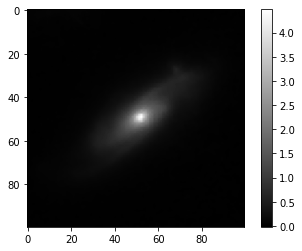

In [38]:
hdul = fits.open(os.path.join(PATH_test, "cosmos_15302.fits"))
hdul.info()

header = hdul[0].header
data = hdul[0].data

# 查看data大小和header里的单位和曝光时间
print("="*20 + " 需要核查的内容 " +"="*20)
print("data最大值:\t", np.max(data))  # data最大值也是偏小，说明data是除过曝光时间的，在GALFIT处理时需要乘回来
print("brightness units:\t", header['BUNIT'])  # 如果单位是ELECTRONS/S，则需要将数据乘以曝光时间
print("曝光时间:\t", header['EXPTIME'])

plt.imshow(data, cmap='gray');
plt.colorbar();

将data乘上曝光时间，生成新的FITS图像

In [41]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
NEXTEND =                    1 / Number of standard extensions                  
FILENAME= 'cosmos-f160w-astrodrizzle-v4.0_drz_sci.fits' / name of file          
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'WFC3  '          

In [45]:
data_new = data * header['EXPTIME']  # 新FITS的data是原data乘上曝光时间
header_new  = header.copy()
header_new['BUNIT'] = 'ELECTRONS'  # 对应修改新FITS的头信息

# 保存修改好的FITS图像
PATH_new = os.path.join(PATH_test, 'cosmos_15302_new.fits')
fits.writeto(PATH_new, data=data_new, header=header_new, overwrite=True)

执行GALFIT，查看结果

In [46]:
PATH_test_imgblock = os.path.join(PATH_test, 'imgblock.fits')
hdul = fits.open(PATH_test_imgblock)
hdul.info()

Filename: /Users/rui/Code/1_Astronotes/11_GALFIT/test/imgblock.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (100, 100)   float32   
  1                1 ImageHDU      4144   (100, 100)   float32   
  2                1 ImageHDU        43   (100, 100)   float32   
  3                1 ImageHDU         6   (100, 100)   float32   


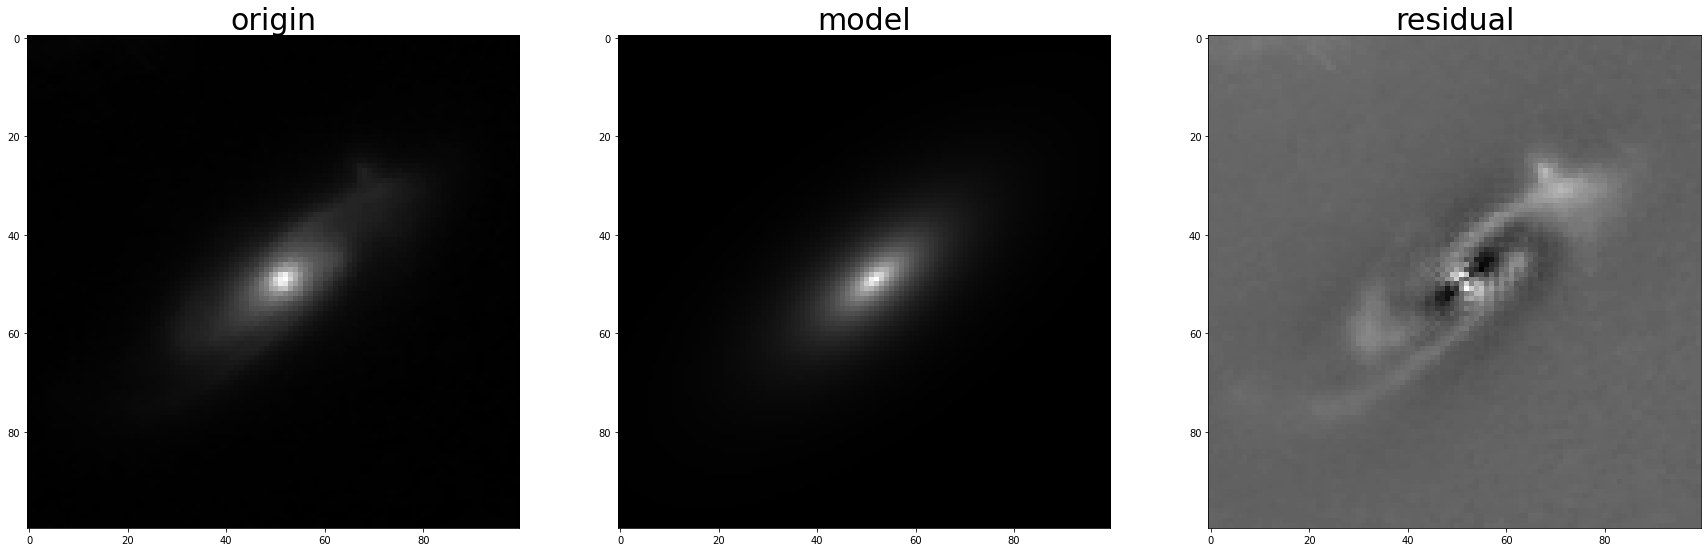

In [47]:
image1 = hdul[1].data
image2 = hdul[2].data
image3 = hdul[3].data

fig, ax = plt.subplots(1, 3, figsize=(30, 10))

ax[0].set_title('origin', fontsize=30)
ax[0].imshow(image1, cmap='gray');

ax[1].set_title('model', fontsize=30)
ax[1].imshow(image2, cmap='gray');

ax[2].set_title('residual', fontsize=30)
ax[2].imshow(image3, cmap='gray');

In [48]:
# 输出拟合参数
hdul[2].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                  100 / Length of data axis 1                          
NAXIS2  =                  100 / Length of data axis 2                          
OBJECT  = 'model   '           / Component type                                 
COMMENT ========== GALFIT Input Parameters ==========                           
INITFILE= 'galfit.feedme'      / GALFIT input file                              
DATAIN  = 'cosmos_15302_new.fits' / Input data image                            
SIGMA   = 'none    '           / Input sigma image                              
PSF     = 'none    '           / Convolution PSF and kernel                     
CONSTRNT= 'none    '           / Parameter constraint file                      
MASK    = 'none    '        